## Stochastic Gradient Descent (SGD)

SGD merupakan metode iteratif untuk mencari parameter model yang menghasilkan solusi optimal. 
SGD memanfaatkan gradient dari fungsi objektif untuk mengarahkan parameter ke tujuan akhir.

Misal diketahui model parametrik $f_\theta: \mathcal{X} \rightarrow \mathcal{Y}$ dan fungsi objektif (e.g., *loss function*) $L(\theta): \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$, SGD melakukan operasi sbb:

$$
\theta_{t} := \theta_{t-1} - \alpha L(\theta)
$$

dimana $\alpha \in \mathbb{R}$ merupakan konstanta yang dinamakan *step size* / *learning rate*.


In [1]:
# Load relevant modules 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time as timer

In [2]:
# Constants
DATADIR = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data')

In [3]:
# Load dataset
datapath = os.path.join(DATADIR, "house_sales.csv")
df = pd.read_csv(datapath)

# Take only price, area, and beds
x_area = df["area"].values
x_beds = df["beds"].values
y = df["price"].values

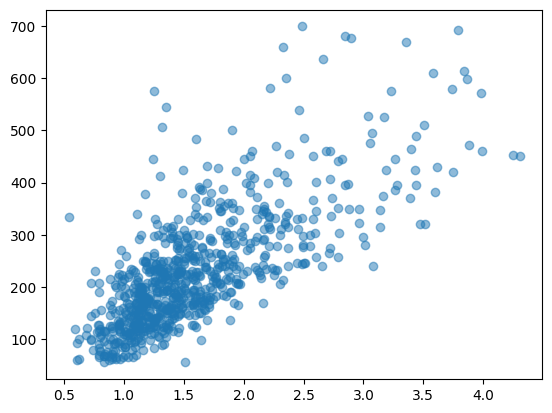

In [4]:
# Plot data
plt.scatter(x_area, y, alpha=0.5)


In [5]:
# Define the model. loss, and gradient functions
f_lin = lambda x, w: w[1] * x + w[0]

loss_fn = lambda x, y, w: np.sum((y - f_lin(x, w)) ** 2)
grad_fn = lambda x, y, w: -2 * np.array([1, x]) * (y - f_lin(x, w))

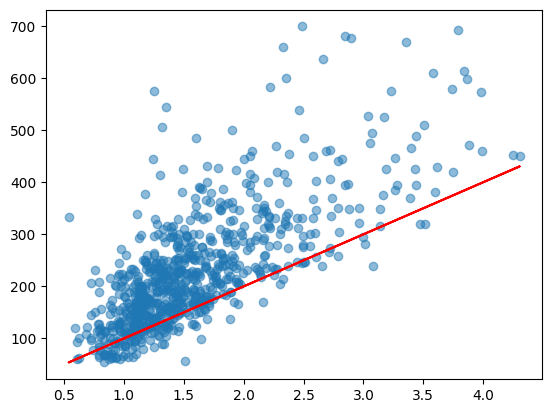

In [6]:
w = np.array([0, 100])
y_pred = f_lin(x_area, w)

# Plot data
plt.scatter(x_area, y, alpha=0.5)
plt.plot(x_area, y_pred, color="red")

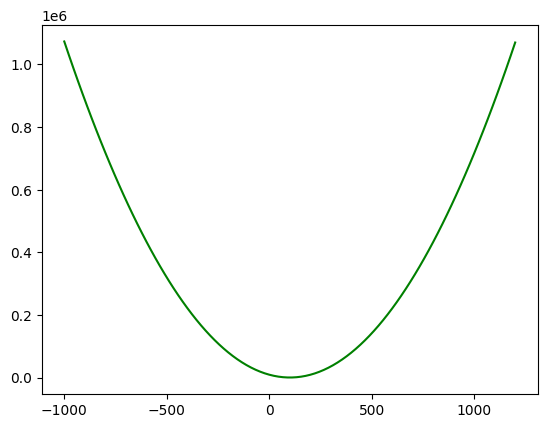

In [7]:
# Plot loss function
ws = np.linspace(-1000, 1200, 100)
losses = []
for w1 in ws:
    w = np.array([0, w1])
    l = loss_fn(x_area[0], y[0], w)
    losses.append(l)

losses = np.array(losses)
plt.plot(ws, losses, color="green")

grad: [-1235.004   -1259.70408]


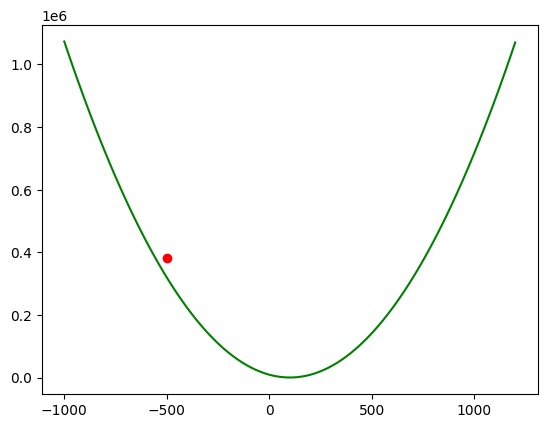

In [8]:
# Plot gradient function
w = np.array([0, -500])
l = loss_fn(x_area[4], y[4], w)
gs = grad_fn(x_area[4], y[4], w)
print(f"grad: {gs}")

plt.plot(ws, losses, color="green")
plt.scatter(w[-1], l, color="red")

#### Training

Epoch-1: loss: 12773.945, elapsed time:  0.0119 secs
Epoch-2: loss: 4216.154, elapsed time:  0.0100 secs
Epoch-3: loss: 3935.179, elapsed time:  0.0086 secs
Epoch-4: loss: 3897.914, elapsed time:  0.0091 secs
Epoch-5: loss: 3892.629, elapsed time:  0.0090 secs
Epoch-6: loss: 3891.763, elapsed time:  0.0089 secs
Epoch-7: loss: 3891.583, elapsed time:  0.0091 secs
Epoch-8: loss: 3891.535, elapsed time:  0.0093 secs
Epoch-9: loss: 3891.520, elapsed time:  0.0090 secs
Epoch-10: loss: 3891.515, elapsed time:  0.0089 secs
Epoch-11: loss: 3891.514, elapsed time:  0.0098 secs
Epoch-12: loss: 3891.513, elapsed time:  0.0084 secs
Epoch-13: loss: 3891.513, elapsed time:  0.0091 secs
Epoch-14: loss: 3891.513, elapsed time:  0.0087 secs
Epoch-15: loss: 3891.513, elapsed time:  0.0087 secs
Epoch-16: loss: 3891.513, elapsed time:  0.0089 secs
Epoch-17: loss: 3891.513, elapsed time:  0.0091 secs
Epoch-18: loss: 3891.513, elapsed time:  0.0098 secs
Epoch-19: loss: 3891.513, elapsed time:  0.0101 secs
E

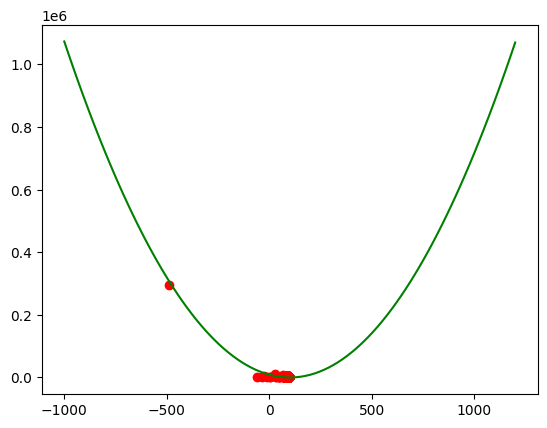

In [9]:
# Run (stochastic) gradient descent
alpha = 1e-3 # step size / learning rate
epochs = 20

plt.plot(ws, losses, color="green")

w = np.array([0, -500])
wo = np.copy(w)

n = len(x_area)

losses = []
elapsed_times = []
for ep in range(epochs):
    loss = 0.
    start_t = timer.time()
    for i in range(n):
        w = w - alpha * grad_fn(x_area[i], y[i], w)
        l = loss_fn(x_area[i], y[i], w)
        loss += l

        if i % 100 == 0:
            plt.scatter(w[-1], l, color="red")
    
    elapsed_t = timer.time() - start_t

    loss_avg = loss / n
    losses.append(loss_avg)
    elapsed_times.append(elapsed_t)
    print(f"Epoch-{ep+1}: loss: {loss_avg:.3f}, elapsed time: {elapsed_t: .4f} secs")


print(f"=== Final loss: {losses[-1]:.3f}, Total elapsed time: {np.sum(elapsed_times):.4f} secs ===")



### Inference / Prediction